In [3]:
#pip install yfinance

In [4]:
import yfinance as fy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#df = fy.download("TCS.NS", start="2024-01-01", end="2025-01-01")


In [5]:
df1=pd.read_csv(r"C:\Users\hkoli\Downloads\stock_tata_tcs.xls")
df1

,Price,Close,High,Low,Open,Volume
0,Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
1,Date,NaN,NaN,NaN,NaN,NaN
2,2024-01-01,3689.464599609375,3709.6974583264628,3652.580508942,3669.037935035828,825907
3,2024-01-02,3662.455078125,3689.4647615916324,3647.014186705242,3689.4647615916324,1344068
4,2024-01-03,3573.923583984375,3651.46719557593,3569.3736371199507,3646.7718943235973,1803075
...,...,...,...,...,...,...
243,2024-12-24,4113.92041015625,4151.816315358072,4093.0528623167015,4093.0528623167015,1181886
244,2024-12-26,4103.68359375,4134.049628782047,4078.140577688001,4113.920313335754,1208464
245,2024-12-27,4099.50048828125,4115.347963377728,4082.1765493053435,4097.679420039338,858100
246,2024-12-30,4093.545166015625,4133.409691121346,4047.479684808028,4085.8677460209447,1527169


In [6]:
df1.to_excel("stock_tata_tcs.xlsx", index=False, engine="openpyxl")
print("done")

done


In [7]:
df1=pd.read_excel(r"C:\Users\hkoli\Downloads\stock_tata_tcs.xlsx")
df1

,Date,Close,High,Low,Open,Volume
0,2024-01-01,3689.464600,3709.697458,3652.580509,3669.037935,825907
1,2024-01-02,3662.455078,3689.464762,3647.014187,3689.464762,1344068
2,2024-01-03,3573.923584,3651.467196,3569.373637,3646.771894,1803075
3,2024-01-04,3549.770264,3600.304198,3534.474490,3583.604750,3598144
4,2024-01-05,3618.600586,3628.136307,3557.563087,3557.708205,1963127
...,...,...,...,...,...,...
241,2024-12-24,4113.920410,4151.816315,4093.052862,4093.052862,1181886
242,2024-12-26,4103.683594,4134.049629,4078.140578,4113.920313,1208464
243,2024-12-27,4099.500488,4115.347963,4082.176549,4097.679420,858100
244,2024-12-30,4093.545166,4133.409691,4047.479685,4085.867746,1527169


In [8]:
df1.shape

(246, 6)

In [9]:
#datatype 
df1.dtypes

Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [10]:
df1

,Date,Close,High,Low,Open,Volume
0,2024-01-01,3689.464600,3709.697458,3652.580509,3669.037935,825907
1,2024-01-02,3662.455078,3689.464762,3647.014187,3689.464762,1344068
2,2024-01-03,3573.923584,3651.467196,3569.373637,3646.771894,1803075
3,2024-01-04,3549.770264,3600.304198,3534.474490,3583.604750,3598144
4,2024-01-05,3618.600586,3628.136307,3557.563087,3557.708205,1963127
...,...,...,...,...,...,...
241,2024-12-24,4113.920410,4151.816315,4093.052862,4093.052862,1181886
242,2024-12-26,4103.683594,4134.049629,4078.140578,4113.920313,1208464
243,2024-12-27,4099.500488,4115.347963,4082.176549,4097.679420,858100
244,2024-12-30,4093.545166,4133.409691,4047.479685,4085.867746,1527169


## Data Cleaning & Processing
1. Are there any missing values in the dataset?

2. Do we have any duplicate dates, and how do we handle them?

3. saw dataypes and change according to data

 


In [12]:
#Are there any missing values in the dataset?
df1.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [13]:
#Do we have any duplicate dates, and how do we handle them?
df1.duplicated().sum()

0

In [14]:
# 3. saw dataypes and change according to data
df1["Date"]=pd.to_datetime(df1["Date"])


In [15]:
df1.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [16]:
price_col=['Close', 'High', 'Low', 'Open']

In [17]:
# Can we normalize the stock price values for easier comparison?
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_stand=df1.copy()
df_stand[price_col]=scaler.fit_transform(df1[price_col])
df_stand.head()



,Date,Close,High,Low,Open,Volume
0,2024-01-01,-1.331379,-1.405249,-1.351347,-1.420098,825907
1,2024-01-02,-1.445708,-1.490425,-1.375167,-1.333520,1344068
2,2024-01-03,-1.820455,-1.650388,-1.707414,-1.514471,1803075
3,2024-01-04,-1.922694,-1.865774,-1.856758,-1.782200,3598144
4,2024-01-05,-1.631341,-1.748606,-1.757955,-1.891961,1963127


<Axes: >

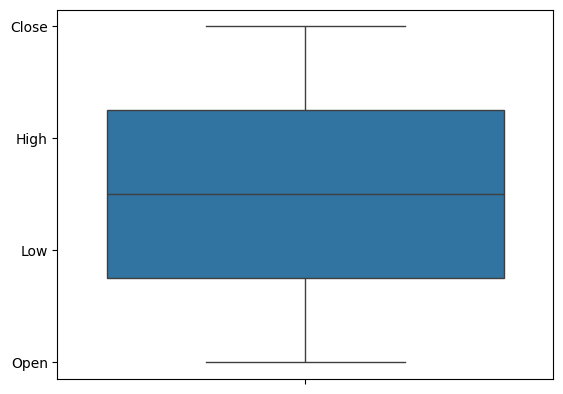

In [18]:
sns.boxplot(price_col)

 ## Statistics & Insights
What is the average closing price of TCS stock?

What is the highest and lowest closing price recorded?

On which date did the highest stock closing occur monthly?

What is the average daily price change (High - Low)?

 The total number of shares traded on monthly (Volume).

What is the correlation between opening and closing prices?

What is the most volatile trading day (highest difference between High & Low)?


In [20]:
#What is the average closing price of TCS stock?
avg_closing=df1["Close"].mean()
print(f"average of closing: {avg_closing:.2f}")



average of closing: 4003.99


In [21]:
#What is the highest and lowest closing price recorded?
highest=df1["Close"].max()
print(f"Highest Closing : {highest}")

lowest=df1["Close"].min()
print(f"lowest closing : {lowest}")

Highest Closing : 4471.39013671875
lowest closing : 3549.770263671875


In [22]:
#On which date did the highest stock closing occur monthly?
monthly=df1["Date"].dt.to_period("M")
g=df1.groupby(monthly)["Close"].max().sort_values(ascending=False)
g




Date
2024-08    4471.390137
2024-09    4440.803223
2024-12    4403.701172
2024-07    4308.490723
2024-11    4284.403320
2024-10    4210.348145
2024-03    4103.514648
2024-02    4035.677979
2024-04    3893.488281
2024-05    3869.806152
2024-06    3854.044678
2024-01    3834.891357
Freq: M, Name: Close, dtype: float64

In [23]:
# What is the average daily price change (High - Low)?
avg_daily=df1["High"]-df1["Low"].mean()
print(f"average daily change : {avg_daily.head()}")

average daily change : 0   -258.669786
1   -278.902483
2   -316.900049
3   -368.063046
4   -340.230938
Name: High, dtype: float64


In [24]:
# The total number of shares traded on monthly (Volume).
total_volumn=df1["Volume"].sum()
total_volumn
group=df1.groupby(monthly)["Volume"].sum().sort_values(ascending=False)
group

Date
2024-07    69792747
2024-03    57449760
2024-10    51094057
2024-04    50101987
2024-06    49068284
2024-05    48397883
2024-01    47730057
2024-09    46733974
2024-12    44350531
2024-08    44299362
2024-02    43410829
2024-11    41293329
Freq: M, Name: Volume, dtype: int64

In [25]:
# What is the correlation between opening and closing prices?
corr=df1["Open"].corr(df1["Close"])
print(f"correlation : {corr}")

correlation : 0.9785986715269455


In [26]:
# What is the most volatile trading day (highest difference between High & Low)?
df1["volatile"]=df1["High"]-df1["Low"] #Volatility refers to how much a stock's price fluctuates in a given period
gro=df1.groupby("Date")["volatile"].sum()
gro

Date
2024-01-01     57.116949
2024-01-02     42.450575
2024-01-03     82.093558
2024-01-04     65.829708
2024-01-05     70.573219
                 ...    
2024-12-24     58.763453
2024-12-26     55.909051
2024-12-27     33.171414
2024-12-30     85.930006
2024-12-31    106.207112
Name: volatile, Length: 246, dtype: float64

## Visualization-Based Questions
Can we plot a line chart showing stock price trends over time?

Can we visualize a candlestick chart for TCS stock?

How does the 7-day and 30-day moving average trend compare to the actual closing price?

Can we plot a histogram of trading volume to see distribution?

How does stock volatility (High - Low) change over time?

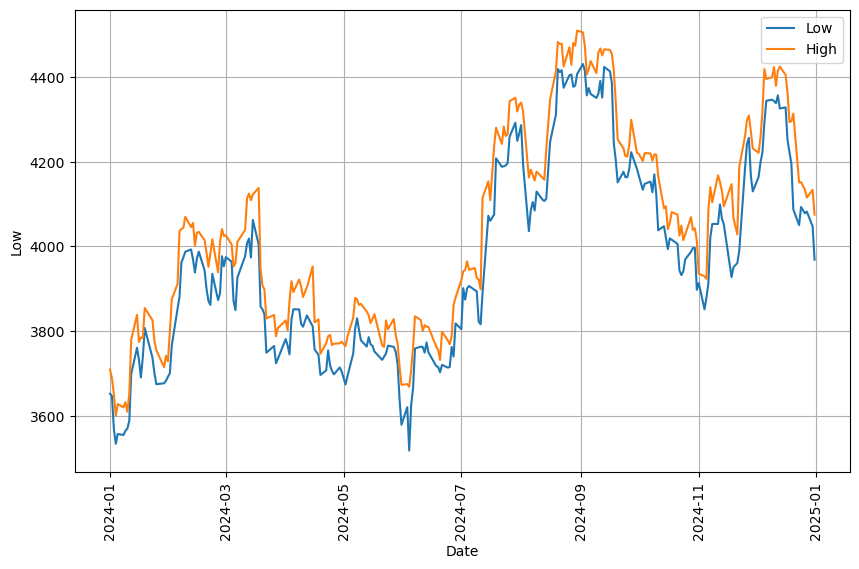

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(df1,x="Date",y='Low',label=("Low"))
plt.plot(df1["Date"],df1["High"],label=("High"))
plt.legend()
plt.xticks(rotation=90)
plt.savefig("line.png", dpi=300, bbox_inches='tight')
plt.grid()

In [82]:
!pip install -U kaleido

In [90]:
import kaleido
print("Kaleido is installed and working!")


Kaleido is installed and working!


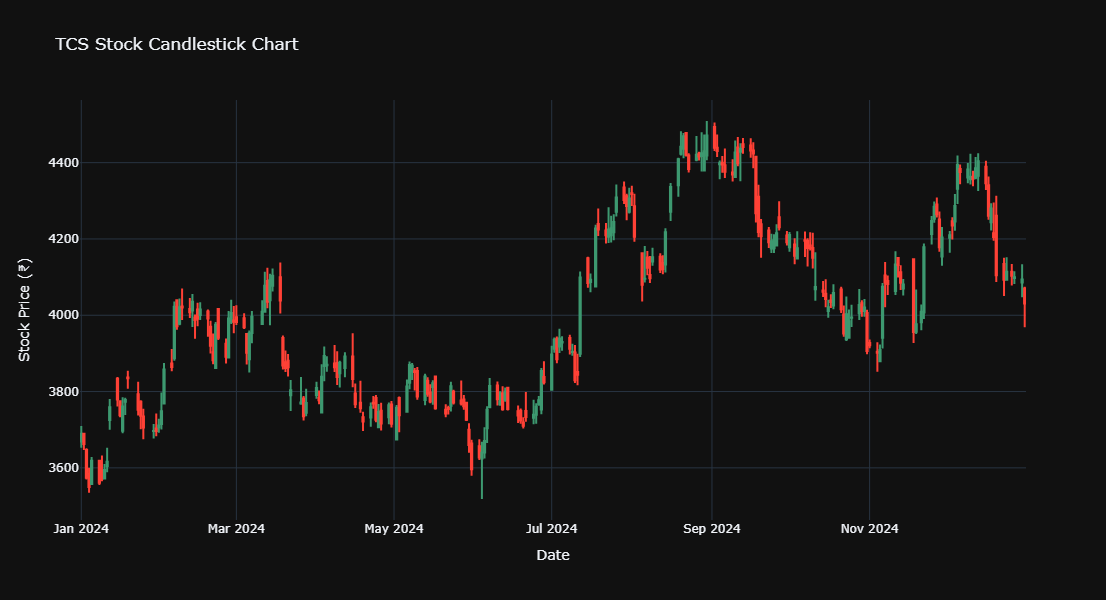

In [94]:
import pandas as pd
import plotly.graph_objects as go


df1["Date"] = pd.to_datetime(df1["Date"])


fig = go.Figure(data=[go.Candlestick(
    x=df1["Date"],
    open=df1["Open"],
    high=df1["High"],
    low=df1["Low"],
    close=df1["Close"],
    name="TCS Stock"
)])

fig.update_layout(
    title="TCS Stock Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Stock Price (₹)",
    xaxis_rangeslider_visible=False,  
    template="plotly_dark",  
    width=1000, height=600
)


fig.show()


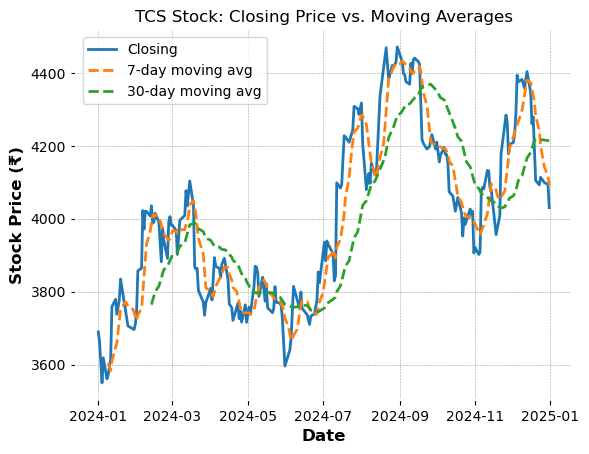

In [96]:
#How does the 7-day and 30-day moving average trend compare to the actual closing price?
df1["7-day"]=df1["Close"].rolling(window=7).mean()
df1["30-day"]=df1["Close"].rolling(window=30).mean()
plt.plot(df1["Date"],df1["Close"],label="Closing")
plt.plot(df1["Date"],df1["7-day"],label="7-day moving avg",linestyle="--")
plt.plot(df1["Date"],df1["30-day"],label="30-day moving avg",linestyle="--")
plt.legend()
plt.xlabel("Date")                # X-axis label
plt.ylabel("Stock Price (₹)")      # Y-axis label
plt.title("TCS Stock: Closing Price vs. Moving Averages")  # Chart title
plt.savefig("ma.png", dpi=300, bbox_inches='tight')
plt.show()

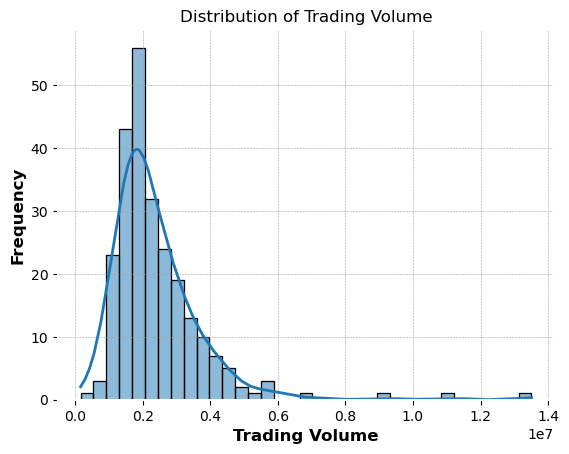

In [98]:
#Can we plot a histogram of trading volume to see distribution?
sns.histplot(df1["Volume"],kde=True)
plt.xlabel("Trading Volume")
plt.ylabel("Frequency")
plt.title("Distribution of Trading Volume")
plt.savefig("hist.png", dpi=300, bbox_inches='tight')
plt.show()

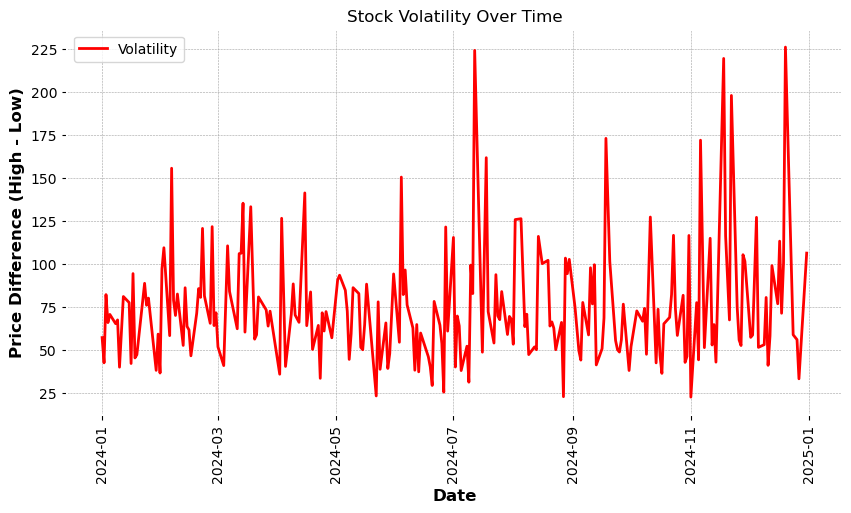

In [102]:
#How does stock volatility (High - Low) change over time?
plt.figure(figsize=(10,5))
sns.lineplot(data=df1, x="Date", y="volatile", color="red", label="Volatility")
plt.xlabel("Date")
plt.ylabel("Price Difference (High - Low)")
plt.title("Stock Volatility Over Time")
plt.xticks(rotation=90)
plt.legend()
plt.savefig("overtime.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 2000x2000 with 0 Axes>

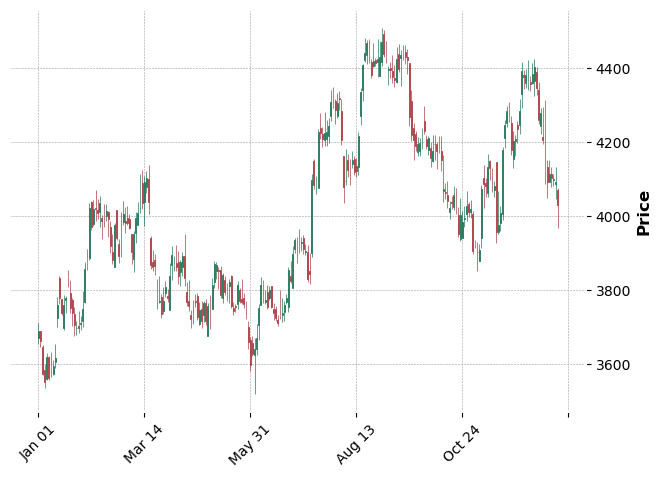

In [33]:
import mplfinance as mpf
df2=df1.copy()
df2=df2.drop(["Volume","volatile","7-day","30-day"],axis=1)
df2.set_index('Date',inplace=True)
plt.figure(figsize=(20,20))
mpf.plot(df2,type='candle',style='charles')


In [34]:
df1

,Date,Close,High,Low,Open,Volume,volatile,7-day,30-day
0,2024-01-01,3689.464600,3709.697458,3652.580509,3669.037935,825907,57.116949,NaN,NaN
1,2024-01-02,3662.455078,3689.464762,3647.014187,3689.464762,1344068,42.450575,NaN,NaN
2,2024-01-03,3573.923584,3651.467196,3569.373637,3646.771894,1803075,82.093558,NaN,NaN
3,2024-01-04,3549.770264,3600.304198,3534.474490,3583.604750,3598144,65.829708,NaN,NaN
4,2024-01-05,3618.600586,3628.136307,3557.563087,3557.708205,1963127,70.573219,NaN,NaN
...,...,...,...,...,...,...,...,...,...
241,2024-12-24,4113.920410,4151.816315,4093.052862,4093.052862,1181886,58.763453,4200.406076,4217.464941
242,2024-12-26,4103.683594,4134.049629,4078.140578,4113.920313,1208464,55.909051,4165.800537,4216.493750
243,2024-12-27,4099.500488,4115.347963,4082.176549,4097.679420,858100,33.171414,4142.788818,4215.425781
244,2024-12-30,4093.545166,4133.409691,4047.479685,4085.867746,1527169,85.930006,4116.205427,4215.703019
